In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf 
from tensorflow import keras

In [3]:
data_x = pd.read_csv("Movie_collection_Independent.csv")

In [4]:
data_y = pd.read_csv("Movie_collection_Target.csv")

In [5]:
data_x.head()

,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available,Genre_Thriller,Genre_Drama,Genre_Comedy
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,1,0,0
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,0,0,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,0,0,1,0


In [6]:
data_y.head()

,Collection
0,2.266667
1,2.106667
2,2.980000
3,2.893333
4,3.080000


# Spliting of Data into Train, Test and Validation Datasets

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
x_train_full, x_test, y_train_full, y_test = train_test_split(data_x, data_y, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state=42)

# Standardization

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [14]:
np.random.seed(42)
tf.random.set_seed(42)

In [16]:
x_train.shape

(284, 19)

In [21]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[19]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                600       
                                                                 
 dense_4 (Dense)             (None, 30)                930       
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,561
Trainable params: 1,561
Non-trainable params: 0
_________________________________________________________________


# Compiling and Training the Model

In [23]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-2), metrics=['mae'])

In [32]:
model_history = model.fit(x_train, y_train, epochs=50, validation_data=(x_valid, y_valid))

Epoch 1/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0354 - mae: 0.1401 - val_loss: 0.1175 - val_mae: 0.2519
Epoch 2/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0353 - mae: 0.1396 - val_loss: 0.1164 - val_mae: 0.2503
Epoch 3/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0352 - mae: 0.1392 - val_loss: 0.1159 - val_mae: 0.2496
Epoch 4/50
9/9 [==============================] - 0s 5ms/step - loss: 0.0352 - mae: 0.1404 - val_loss: 0.1163 - val_mae: 0.2505
Epoch 5/50
9/9 [==============================] - 0s 5ms/step - loss: 0.0347 - mae: 0.1395 - val_loss: 0.1169 - val_mae: 0.2511
Epoch 6/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0345 - mae: 0.1386 - val_loss: 0.1160 - val_mae: 0.2497
Epoch 7/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0347 - mae: 0.1383 - val_loss: 0.1160 - val_mae: 0.2498
Epoch 8/50
9/9 [==============================] - 0s 5ms/step - loss: 0.0342 - mae: 0.1380 - val_loss: 0

In [33]:
mae_test = model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 3.4611 - mae: 0.4764


In [34]:
model_history.history

{'loss': [0.03540307283401489,
  0.035345613956451416,
  0.03515459969639778,
  0.03516005724668503,
  0.034729938954114914,
  0.03451282158493996,
  0.03472796455025673,
  0.03419572114944458,
  0.03427502140402794,
  0.03419514372944832,
  0.0339207723736763,
  0.03401187062263489,
  0.033586084842681885,
  0.033832624554634094,
  0.03317930921912193,
  0.03317682072520256,
  0.032944172620773315,
  0.033014651387929916,
  0.03287050127983093,
  0.03275974094867706,
  0.032558541744947433,
  0.03247849643230438,
  0.032200973480939865,
  0.03227511793375015,
  0.03197497874498367,
  0.0317845493555069,
  0.03167247772216797,
  0.03172067180275917,
  0.03174671158194542,
  0.03159907087683678,
  0.031160959973931313,
  0.0315902903676033,
  0.030961960554122925,
  0.030856216326355934,
  0.030717603862285614,
  0.030514666810631752,
  0.0305375587195158,
  0.03020579367876053,
  0.03005755878984928,
  0.030078545212745667,
  0.03015105426311493,
  0.030053628608584404,
  0.02987590618

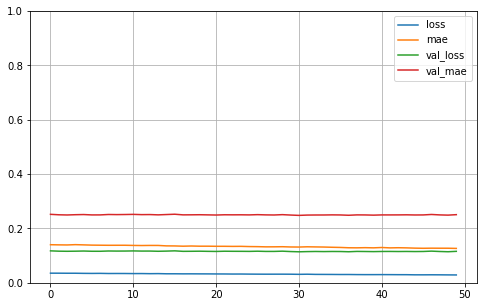

In [35]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Making Prediction on Test Dataset

In [36]:
x_new = x_test[:5]

In [37]:
y_pred = model.predict(x_new)
print(y_pred)
print(y_test[:5])

[[2.1466491]
 [2.89699  ]
 [1.8758135]
 [2.1308355]
 [1.9582047]]
     Collection
173    2.240000
274    2.826667
491    1.573333
72     2.186667
452    1.740000
